# China or Khitan

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://gist.githubusercontent.com/frankwwu/3c2ee5d4ea94f151d4df9ed759dd46c5/raw/f2ceb2074b0cf96e20b610f5ba05afd7d379985b/China-or-Khitan.csv'
countries = pd.read_csv(url, keep_default_na=False, na_values=[' '])

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [4]:
merged_data = world.merge(countries, left_on='name', right_on='Country')
print('Khitan:')
print(merged_data[(merged_data.Word=='Khitan')].sort_values(by=['Country']).Country.to_string(index=False))

Khitan:
     Belarus
    Bulgaria
  Kazakhstan
  Kyrgyzstan
      Russia
Turkmenistan
     Ukraine
  Uzbekistan


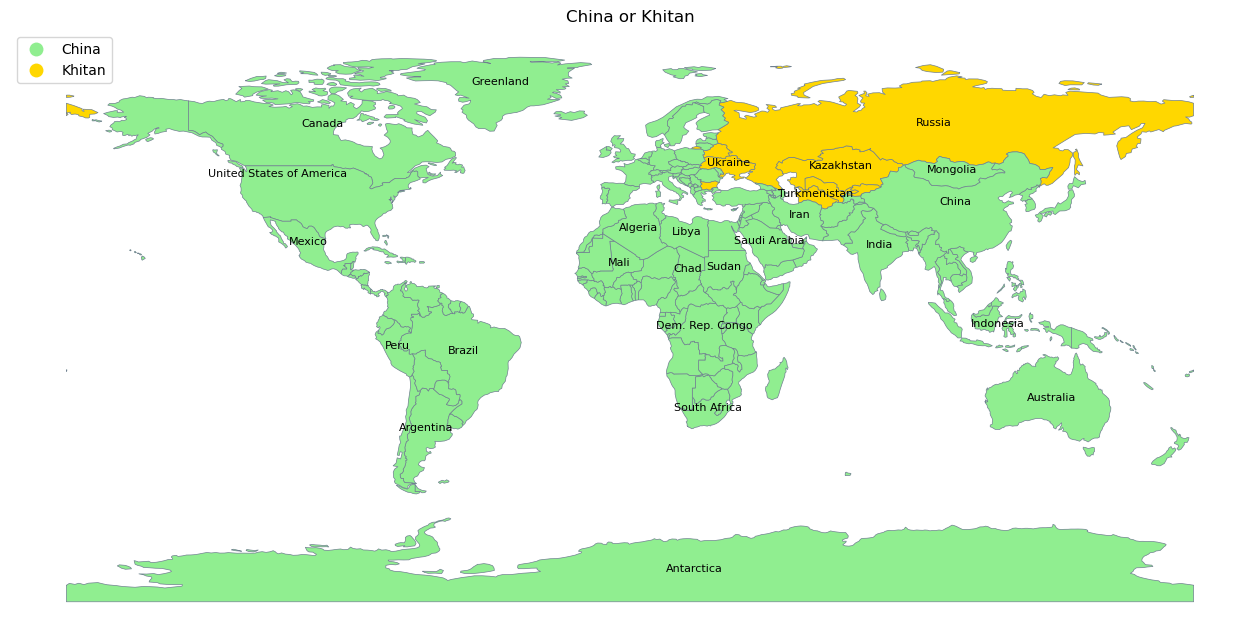

In [5]:
fig, ax = plt.subplots(figsize=(16, 12))
cmap = LinearSegmentedColormap.from_list("",['lightgreen','gold'])
place = {'loc': 'upper left'}
merged_data.plot(column='Word', cmap=cmap, ax=ax, edgecolor='slategrey', linewidth=0.5, legend=True, legend_kwds=place)
labeled_countries = merged_data[((merged_data.geometry.area > 105) & (merged_data.Word=='China')) | 
                                ((merged_data.geometry.area > 50) & (merged_data.Word=='Khitan'))]
labeled_countries.apply(lambda x: ax.annotate(text=x['Country'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
ax.set_title('China or Khitan')
ax.axis('off')
fig.savefig('China-or-Khitan.png', bbox_inches='tight')